<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module3/hw6_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [ ]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

In [ ]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [ ]:
df.shape

(53940, 2)

In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]
  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  mask = (column >= lower) & (column <= upper)
  return df[mask]


In [ ]:
for column_name in df.columns:
  df = remove_outliers(df, column_name)
df.describe()

,carat,price
count,49516.000000,49516.000000
mean,0.707094,3019.606087
std,0.362928,2576.559708
min,0.200000,326.000000
25%,0.380000,900.000000
50%,0.620000,2084.000000
75%,1.010000,4523.000000
max,2.000000,11003.000000


In [ ]:
df.shape

(49516, 2)

<Axes: xlabel='carat', ylabel='price'>

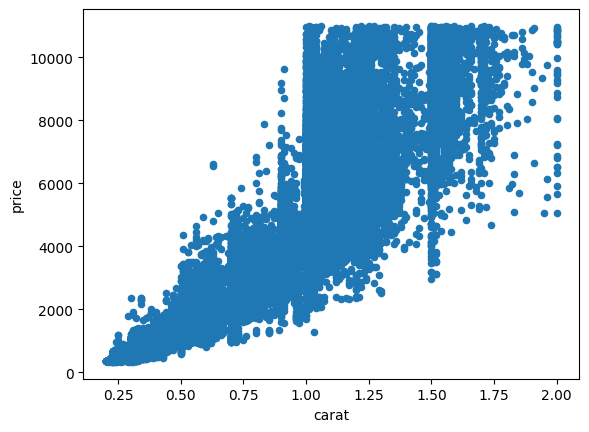

In [ ]:
df.plot(kind='scatter', x='carat', y='price')

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [ ]:
from sklearn.model_selection import train_test_split
y=df['price']
X=df['carat'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
def get_metrics(y_true, y_pred, name='model'):
  df = pd.DataFrame()

  df.loc['MAE', name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc['RMSE', name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc['R2', name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
all_metrics = pd.DataFrame()
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

In [ ]:
all_metrics

,train,test
MAE,655.31,664.91
RMSE,1003.80,1014.02
R2,0.85,0.85


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [ ]:
model.coef_

array([6533.40086669])

In [ ]:
model.intercept_

-1599.3302053561974

price = carat*6533.4-1599.33

# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками

In [ ]:
df['carat_sq'] = df['carat']**2
X = df.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
all_metrics = pd.DataFrame()
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

In [ ]:
all_metrics

,train,test
MAE,626.48,637.00
RMSE,998.50,1008.17
R2,0.85,0.85


In [ ]:
model.coef_

array([5307.67363168,  741.576939  ])

In [ ]:
model.intercept_

-1201.1047372346957

price = 1201.1 - (5307.67 * carat) + (741.57 * carat_sq)

Заключение: На мой взгляд, судя по метрикам, модели можно считать одинаковыми. За счет появления второй независимой переменной, а за ней соответственно второго коэфициента, первый коэфициент несколько уменьшился, но на выходе мы получаем идентичное значение метрики R2 и незначительные изменения в оставшихся двух.